#### Задания для выполнения:

0. Загрузите датасет для предсказани цены квартиры в зависимости от ряда признаков.
1. Постройте круговую диаграмму для признака `Rooms`, иллюстрирующую количество квартир в процентах в зависимости от количества комнат. Сделайте сектор с наибольшим числом квартир выдвинутым.
2. Постройте гистограмму целевой переменной `Price`. Оцените визуально, по какой цене продаётся наибольшее количество квартир. 
3. Постройте диаграммы рассеяния для признаков `Rooms`, `Square`, `HouseFloor`, `HouseYear` в зависимости от целевой переменной `Price` в одной области fiagure(). Оцените визуально, есть ли среди них такие, на которых разброс точек близок к линейной функции.
4. Постройте ядерную оценку плотности целевой переменной `Price`. Оцените визуально, напоминает ли полученный график нормальное распределение. Постройте двумерную ядерную оценку плотности для целевой переменной `Price` и признака `HouseFloor`, затем оцените визуально на каких этажах и по какой цене продаётся основная масса квартир.
5. Постройте ящиковую диаграмму признака `Square`. Оцените визуально имеются ли выбросы, и, если да, то начиная с какого размера площади значение признака можно считать выбросом.
6. При помощи сетки графиков `PairGrid` визуализируйте попарные отношения признаков `Rooms`, `Square`, `HouseFloor`, `HouseYear`, `Price` следующим образом: на диагонали - гистограммы, под диагональю - ядерные оценки плотности, над диагональю - диаграммы рассеяния. По результатам визуализации сделайте выводы (аналогичные п.2,3,4).
7. Постройте тепловую карту матрицы корреляции (`df.corr()`) признаков `Rooms`, `Square`, `HouseFloor`, `HouseYear`, `Price`. По ней определите, какие признаки являются зависимыми (у таких признаков коэффициент корреляции близок к единице).

Должны быть подписаны названия графиков, названия осей, указаны значения на осях. Оцениваться будет использование 
количества различных атрибутов при построении графиков и визуальная красота.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, FormatStrFormatter
import numpy as np

df = pd.read_csv("train.csv", sep=",", index_col=0)


In [2]:
display(df)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.455796
16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580


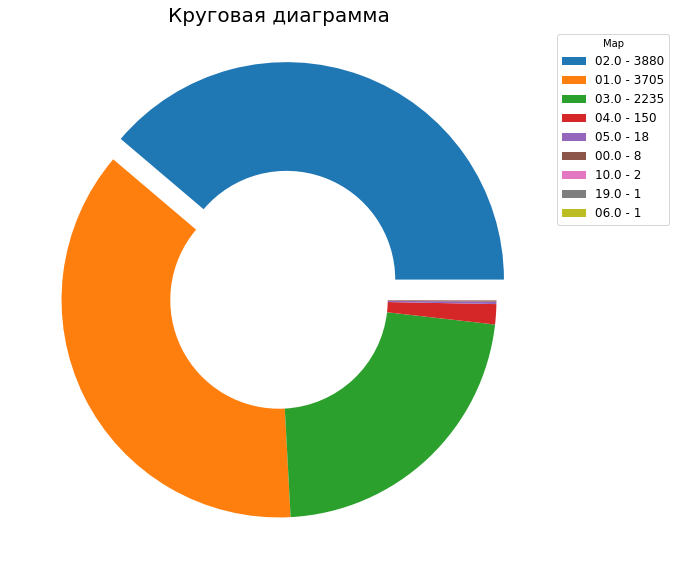

In [2]:
from turtle import color

count = df["Rooms"].value_counts()
rooms = [f"{str(i).rjust(4, '0')} - {count[i]}" for i in count.index]

fig, ax = plt.subplots(figsize=(14,10), facecolor="white")

plt.title("Круговая диаграмма", fontsize=20)

myexplode = [0.1] + [0]*(len(rooms)-1)
textprops = {"fontsize":14}

plt.pie(
    count,
    explode=myexplode,
    textprops=textprops,
    wedgeprops=dict(width=0.5),
    )

plt.legend(labels=rooms,
          title ="Map",
          bbox_to_anchor=(1,1),
          fontsize=12)

plt.show()

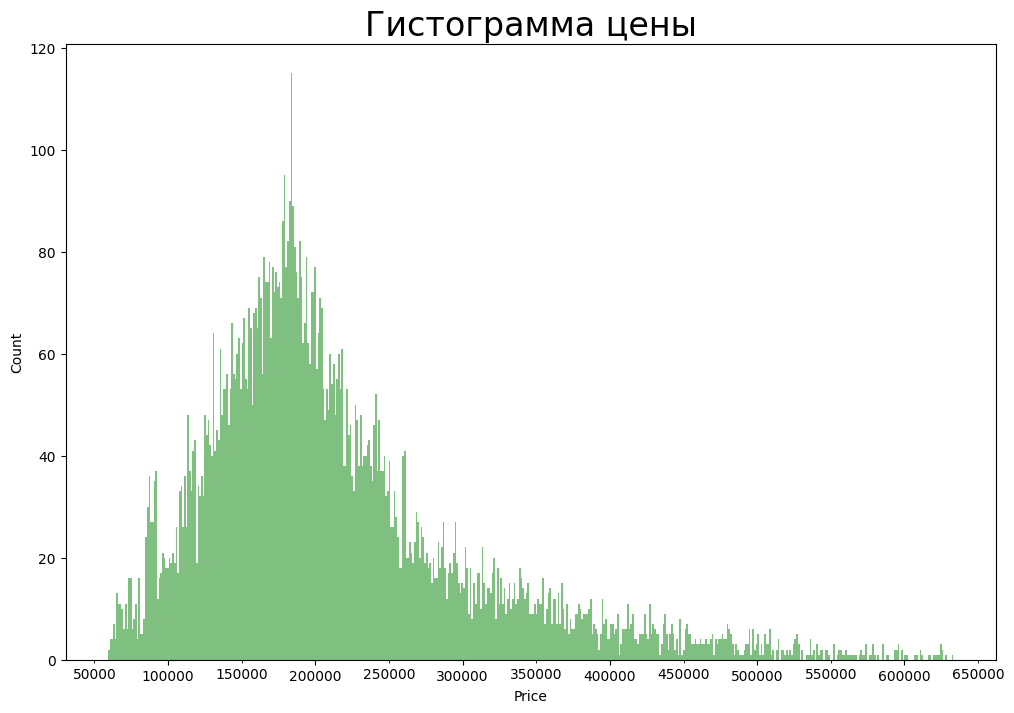

In [3]:
price = df["Price"]

num_bins = 500

minorLocator = AutoMinorLocator(n=2)
minorFormatter = FormatStrFormatter('%.0f')

fig, ax = plt.subplots(figsize=(12,8))

plt.title("Гистограмма цены", fontsize=24)

ax.hist(price, num_bins, color ='green', alpha = 0.5)

xax = ax.xaxis

xax.set_minor_locator(minorLocator)
xax.set_minor_formatter(minorFormatter)

plt.xlabel('Price')
plt.ylabel('Count')

plt.show()

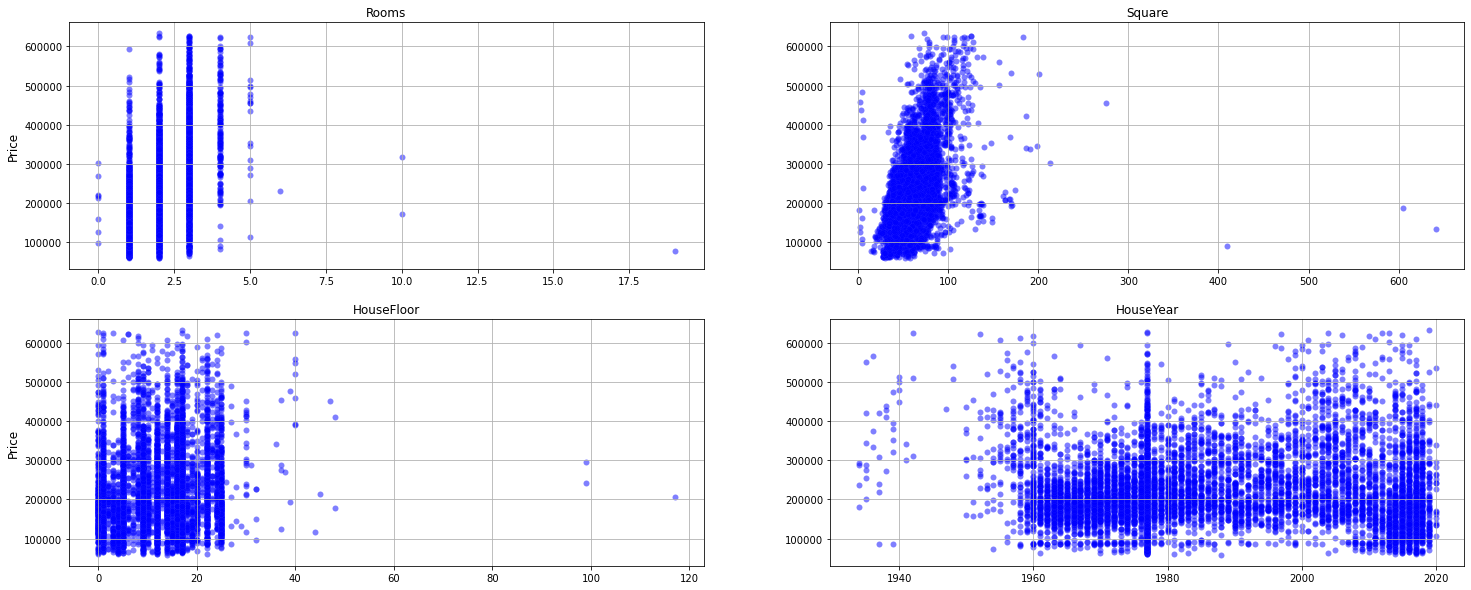

In [4]:
from turtle import title

df_copy = df.copy()

column = "HouseYear"

q1 = df_copy[column].quantile(q=0.25)
q3 = df_copy[column].quantile(q=0.75)

iqr = q3 - q1

df_copy.drop(index=df_copy[(df_copy[column]<(q1-1.5*iqr))|(df_copy[column]>(q3+1.5*iqr))].index, inplace=True)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

data = ["Rooms","Square","HouseFloor","HouseYear"]

for i, ax in enumerate(fig.axes):
    ax.scatter(x=df_copy[data[i]], y=df_copy["Price"], color = "blue", edgecolors = "white", linewidths = 0.05, alpha = 0.5)
    ax.grid(True)
    ax.set_title(data[i])
    if i%2 == 0: ax.set_ylabel("Price", fontsize=12)



plt.show()

Upper bound: 102.08924188493728
Lower bound: 5.586264180189367


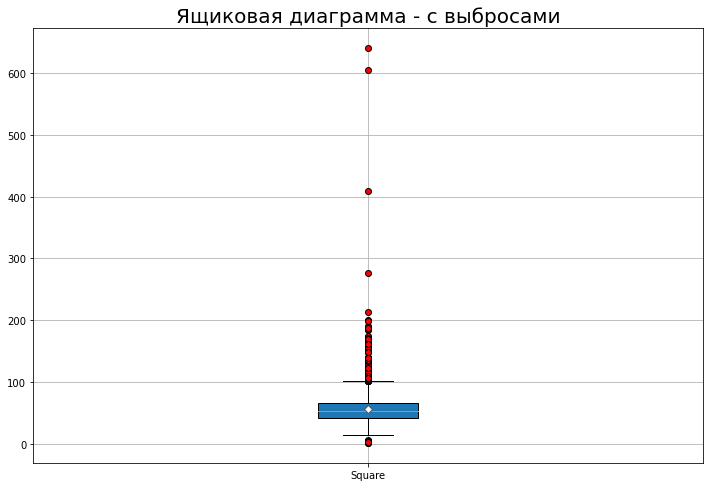

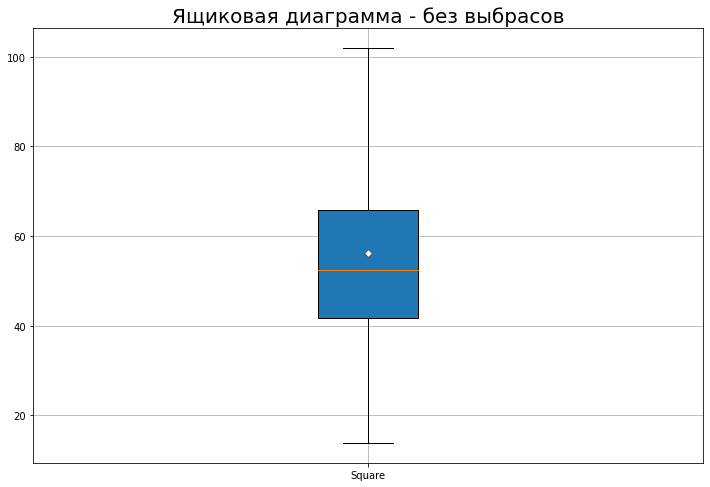

In [5]:
df_copy = df.copy()

flierprops=dict(markerfacecolor='red', marker='o')
mean_shape = dict(markerfacecolor='#fff', marker='D', markeredgecolor='#555')

square = df_copy["Square"]

column = "Square"

q1 = df_copy[column].quantile(q=0.25)
q3 = df_copy[column].quantile(q=0.75)

iqr = q3 - q1

upper = (q3+1.5*iqr)
lower = (q1-1.5*iqr)

print("Upper bound:",upper)
print("Lower bound:",lower)

fig, axes = plt.subplots(figsize=(12,8))

plt.title("Ящиковая диаграмма - с выбросами", fontsize=20)

plt.boxplot(
    square,
    labels=["Square"],
    patch_artist=True,
    flierprops=flierprops,
    showmeans=True,
    meanprops=mean_shape)

plt.grid(True)

plt.show()

fig, axes = plt.subplots(figsize=(12,8))

plt.title("Ящиковая диаграмма - без выбрасов", fontsize=20)

plt.boxplot(
    square,
    labels=["Square"],
    patch_artist=True,
    showfliers=False,
    showmeans=True,
    meanprops=mean_shape
    )
    
plt.grid(True)

plt.show()


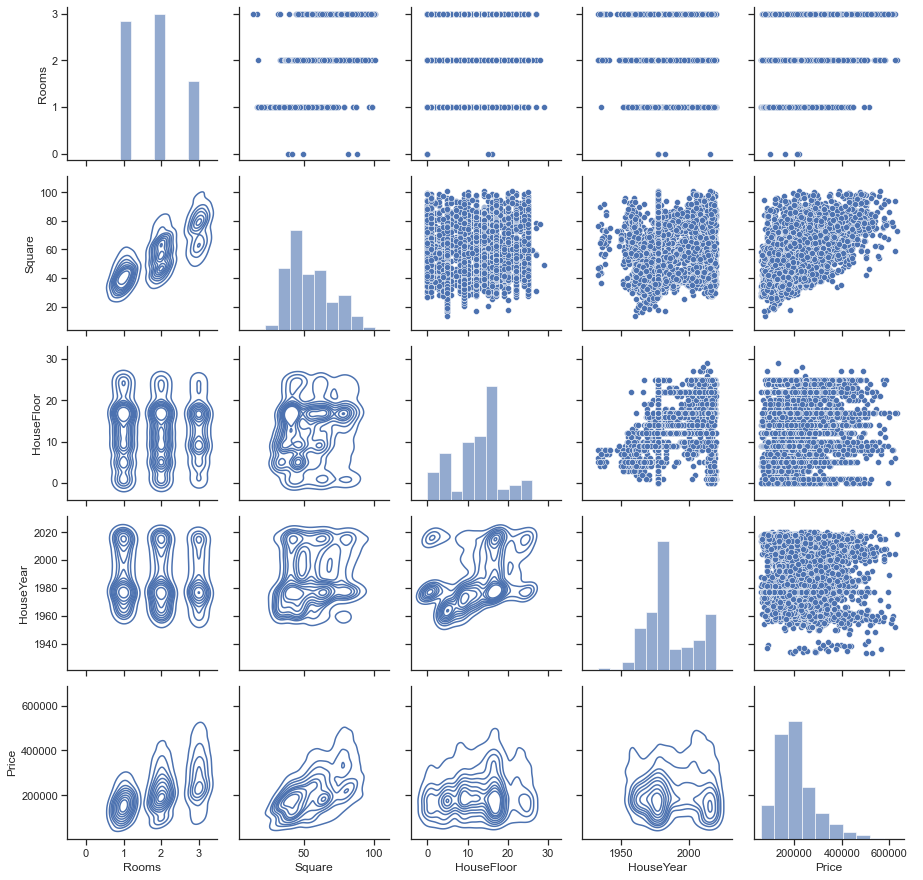

In [8]:
from cProfile import label
import seaborn as sns

df_copy = df.copy()

data = ["Rooms","Square","HouseFloor","HouseYear"]

for column in data:
    q1 = df_copy[column].quantile(q=0.25)
    q3 = df_copy[column].quantile(q=0.75)

    iqr = q3 - q1

    df_copy.drop(index=df_copy[(df_copy[column]<(q1-1.5*iqr))|(df_copy[column]>(q3+1.5*iqr))].index, inplace=True)


sns.set(style="ticks")

g = sns.PairGrid(data=df_copy[["Rooms", "Square", "HouseFloor", "HouseYear", "Price"]])
g.map_upper(sns.scatterplot)
g.map_diag(plt.hist, alpha=0.6)
g.map_lower(sns.kdeplot)

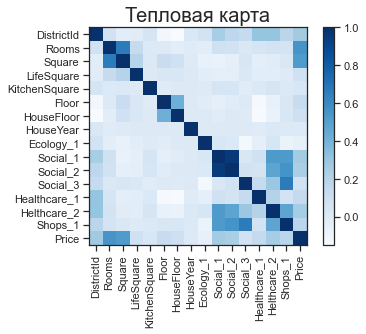

In [7]:
matrix = df.corr()

columns = (matrix.columns)
index = (matrix.index)

plt.title("Тепловая карта", fontsize=20)

plt.xticks(ticks=range(len(columns)),labels=columns,rotation=90)
plt.yticks(ticks=range(len(index)),labels=index)

hm=plt.imshow(matrix, cmap='Blues',interpolation="nearest")

plt.colorbar(hm)

plt.show()